In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sparse_filtering import SparseFiltering
from libnmf.gnmf import GNMF
import matplotlib.pyplot as plt
%matplotlib inline
%run nifti_tools.ipynb
%run overlap_functions.ipynb

In [ ]:
!pip install sparse_filtering

In [2]:
# Loading the voxel * gene matrix
X = np.load('/data/bioprotean/ABA/MEMMAP/genes_list/genes_half_mask_pos_std.npy')

In [42]:
n_features = 300
# How many features are learned

estimator = SparseFiltering(n_features = n_features, maxfun = 200, iprint = 10)
# The maximal number of evaluations of the objective function
# after how many function evaluations is information printed
# by L-BFGS. -1 for no information
features = estimator.fit_transform(X)

# Saving features
np.save('/data/bioprotean/ABA/SFT/half_mask_'+str(n_features)+'.npy', features)

In [ ]:
# Running the SFT for different number of features

# List of numbers
numbers_list = range(50,601,50)

for n in numbers_list:
    estimator = SparseFiltering(n_features = n, maxfun = 200, iprint = 10)
    features = estimator.fit_transform(X)
    weights = estimator.w_
    
    # Saving features and weights
    np.save('/data/bioprotean/ABA/SFT/'+str(n)+'_features.npy', features)
    np.save('/data/bioprotean/ABA/SFT/'+str(n)+'_weights.npy', weights)

In [ ]:
# Running the SFT for different number of features

# List of feature numbers
features_list = range(50,601,50)

# List of cluster numbers
numbers_list = list(range(1,50))
extra_list = list(range(50,551,50))
add_number = 594
numbers_list.extend(extra_list)
numbers_list.append(add_number)

for n_features in features_list:
    # Loading features
    features = np.load('/data/bioprotean/ABA/SFT/'+str(n_features)+'_features.npy')
    
    # Running K-means
    for n_clusters in numbers_list:
        kmeans = KMeans(n_clusters = n_clusters, n_init = 50, random_state = 0)
        kmeans.fit_predict(X)
        labels = kmeans.labels_
        
        # Saving the labels
        np.save('/data/bioprotean/ABA/SFT/'+str(n_features)+'features_'+str(n_clusters)+'_clusters.npy', labels)

In [71]:
estimator.w_[0][4]

118472.68866407534

In [56]:
# Running K-means on features
n_clusters = 200
kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=0)
kmeans.fit_predict(features)
labels = kmeans.labels_

In [54]:
# Reconstructing the labels
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

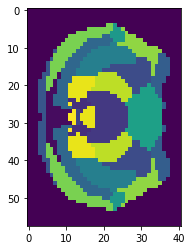

In [58]:
#Visualizing one slice
vol = labels_rc.reshape(67,58,41)
s = vol[30,:,:]
plt.imshow(s)

In [ ]:
# Running for list of numbers

numbers_list = list(range(1,50))
extra_list = list(range(50,551,50))
add_number = 594
numbers_list.extend(extra_list)
numbers_list.append(add_number)

# Running K-means on features
for n in numbers_list:
    kmeans = KMeans(n_clusters = n, n_init = 50, random_state = 0)
    kmeans.fit_predict(features)
    
    # Saving the labels
    labels = kmeans.labels_
    labels_path = '/data/bioprotean/ABA/SFT/Kmeans/'+str(n)+'_clusters.npy'
    np.save(labels_path, labels)

In [51]:
# Reconstructing all clusters

# List of numbers
numbers_list = list(range(1,50))
extra_list = list(range(50,551,50))
add_number = 594
numbers_list.extend(extra_list)
numbers_list.append(add_number)

# Loading K-means clusters
for i in numbers_list:
    # Loading the labels
    labels_path = '/data/bioprotean/ABA/SFT/Kmeans/'+str(i)+'_clusters.npy'
    labels = np.load(labels_path)
    
    # Reconstructing the clusters
    indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
    labels_rc = reconstruct_ABA(labels, indices_path)
    
    # Saving to file
    save_path = '/data/bioprotean/ABA/SFT/Kmeans_rc/'+str(i)+'_clusters.npy'
    np.save(save_path, labels_rc)

In [10]:
def plot_feature_slice(features_arr, feature_n, slice_n):
    '''
    Plotting a feature in the selected slice.
    
    Args:
        features_arr: array
            The features array.
        
        feature_n: int
            The number of the feature.
        
        slice_n: int
            The number of the slice to show.
    
    Returns:
        plot
    '''
    # Selecting the feature from the main features array
    feature = features_arr[:, feature_n]
    
    # Reconstructing the features
    indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
    feature_rc = reconstruct_ABA(feature, indices_path)
    
    # Reshaping the feature vector and selecting the slice
    feature_3D = feature_rc.reshape(67,58,41)
    slice = feature_3D[slice_n,:,:]
    plt.imshow(slice)

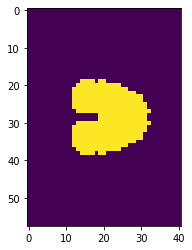

In [18]:
# Loading the featues array
features_path = '/data/bioprotean/ABA/SFT/100_features.npy'
features = np.load(features_path)

feature_n = 4
slice_n = 10
plot_feature_slice(features, feature_n, slice_n)

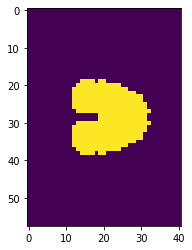

In [24]:
# Loading the featues array
features_path = '/data/bioprotean/ABA/SFT/100_features.npy'
features = np.load(features_path)

feature_n = 5
slice_n = 10

# Selecting the feature from the main features array
feature = features[:, feature_n]

# Reconstructing the features
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
feature_rc = reconstruct_ABA(feature, indices_path)

# Reshaping the feature vector and selecting the slice
feature_3D = feature_rc.reshape(67,58,41)
slice = feature_3D[slice_n,:,:]
plt.imshow(slice)

In [2]:
# Reconstructing the labels
labels_path = '/data/bioprotean/ABA/SFT/clusters/100features_594_clusters.npy'
labels = np.load(labels_path)

# Reconstructing the clusters
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

np.save('/data/bioprotean/ABA/SFT/100f_594c_rc.npy', labels_rc)

In [4]:
# Loading the features
features_path = '/data/bioprotean/ABA/SFT/100_features.npy'
features = np.load(features_path)

In [15]:
np.equal(features[:,10],features[:,11])

array([False, False, False, ..., False, False, False])

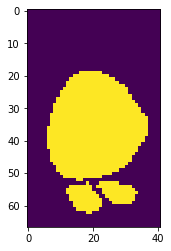

In [24]:
# Reconstructing the selected feature
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
feature_n = 7
feature1 = features[:, feature_n]
feature_rc1 = reconstruct_ABA(feature1, indices_path)

# Visualizing the feature
slice = features_rc1[:,10,:]
plt.imshow(slice)

In [25]:
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
feature_n = 0
feature2 = features[:, feature_n]
feature_rc2 = reconstruct_ABA(feature2, indices_path)

In [29]:
np.equal(feature_rc2, feature_rc1).sum()

159326

In [44]:
np.unique(feature2).shape

(31512,)

In [45]:
np.load(indices_path).shape

(1, 31512)

In [47]:
labels_path = '/data/bioprotean/ABA/SFT/clusters/100features_100_clusters.npy'
np.load(labels_path)

(31512,)